In [4]:
import numpy as np
from scipy.stats import beta as betaf
import matplotlib.pyplot as plt
import math
from scipy.stats import beta

In [3]:
# Set the true probability for the single-arm bandit
true_p = 0.65 

# Initialize alpha and beta (parameters for the beta distribution)
alpha, beta = 1, 1

# Number of iterations for the experiment
iterations = 1000

# Lists to keep track of means, variances, and distributions
means = []
variances = []

# Simulate the Thompson update rule over several iterations
np.random.seed(0)  # For reproducibility
for _ in range(iterations):
    # Simulate pulling the arm of the bandit
    reward = np.random.rand() < true_p  # Reward is 1 with probability p, else 0
    
    # Update alpha and beta
    alpha += reward
    beta += 1 - reward
    
    # Calculate the current mean and variance of the beta distribution
    current_mean = alpha / (alpha + beta)
    current_variance = (alpha * beta) / ((alpha + beta)**2 * (alpha + beta + 1))
    
    # Store the mean and variance for plotting
    means.append(current_mean)
    variances.append(current_variance)


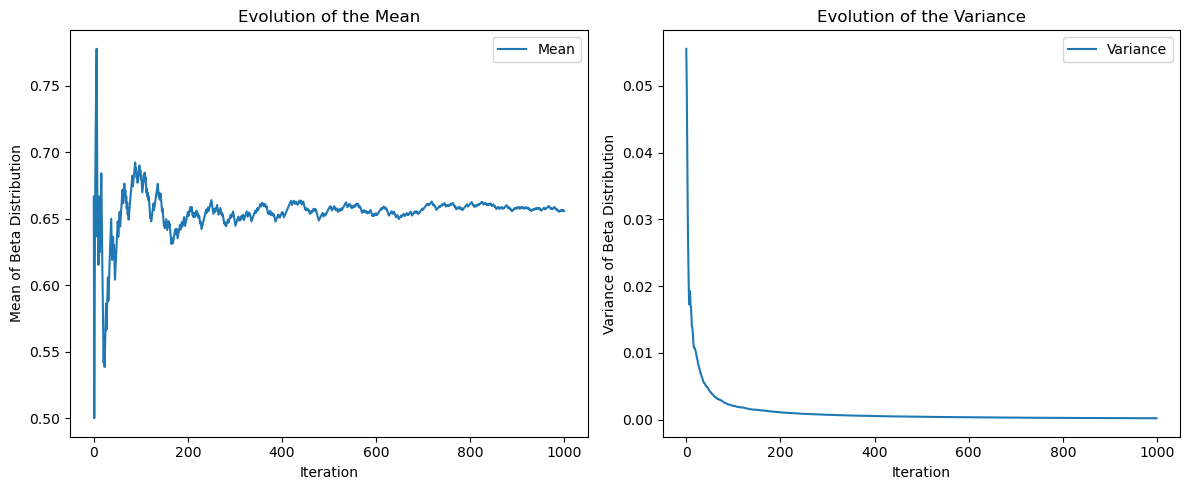

AttributeError: 'int' object has no attribute 'pdf'

<Figure size 1200x500 with 0 Axes>

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(means, label='Mean')
plt.xlabel('Iteration')
plt.ylabel('Mean of Beta Distribution')
plt.title('Evolution of the Mean')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(variances, label='Variance')
plt.xlabel('Iteration')
plt.ylabel('Variance of Beta Distribution')
plt.title('Evolution of the Variance')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
x = np.linspace(0, 1, 100)
selected_iterations = [1, 10, 50, 100, 500, 1000]

for i in selected_iterations:
    a, b = means[i-1] * (alpha + beta) - 1, variances[i-1] * (alpha + beta)**2 * (alpha + beta + 1) - alpha
    y = beta.pdf(x, a, b)
    plt.plot(x, y, label=f'Iteration {i}')

plt.title('Beta Density Over Iterations')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend()
plt.show()

In [9]:
# Set the true reward probabilities for each arm
true_ps = [0.3, 0.5, 0.7] 

# Number of arms
K = 3

# Initialize alpha and beta for each arm
alphas = np.ones(K)
betas = np.ones(K)

# Number of iterations for the experiment
iterations = 1000

In [10]:
# Function to simulate the Thompson Sampling for K-armed bandit
def thompson_sampling(true_ps, alphas, betas, iterations):
    rewards = np.zeros(K)
    chosen_arms = np.zeros(K)

    for _ in range(iterations):
        # Sample from the beta distribution for each arm
        sampled_ps = [np.random.beta(a, b) for a, b in zip(alphas, betas)]
        
        # Select the arm with the highest sample
        k_max = np.argmax(sampled_ps)
        
        # Simulate pulling the selected arm
        reward = np.random.rand() < true_ps[k_max]
        
        # Update chosen arm count and rewards
        chosen_arms[k_max] += 1
        rewards[k_max] += reward
        
        # Update parameters with Bayesian update rule
        alphas[k_max] += reward
        betas[k_max] += 1 - reward
    
    return rewards, chosen_arms

In [11]:
# Run the Thompson Sampling
rewards, chosen_arms = thompson_sampling(true_ps, alphas, betas, iterations)

# Output the results
print(f"Total rewards per arm: {rewards}")
print(f"Number of times each arm was chosen: {chosen_arms}")

Total rewards per arm: [  0.  19. 669.]
Number of times each arm was chosen: [  5.  37. 958.]


In [5]:
num_arms = 3
num_trials = 1000
true_arm_probs = np.array([0.3, 0.5, 0.7])

In [6]:
# Thompson Sampling
def thompson_sampling(true_arm_probs, num_trials):
    alphas = np.ones(num_arms)
    betas = np.ones(num_arms)
    regrets = []
    total_regret = 0
    
    for t in range(num_trials):
        samples = [np.random.beta(alphas[i], betas[i]) for i in range(num_arms)]
        chosen_arm = np.argmax(samples)
        reward = np.random.binomial(1, true_arm_probs[chosen_arm])
        total_regret += max(true_arm_probs) - true_arm_probs[chosen_arm]
        regrets.append(total_regret)
        alphas[chosen_arm] += reward
        betas[chosen_arm] += 1 - reward

    return regrets

# UCB
def ucb(true_arm_probs, num_trials, c):
    arm_means = np.zeros(num_arms)
    arm_counts = np.zeros(num_arms)
    regrets = []
    total_regret = 0
    
    for t in range(num_trials):
        ucb_values = arm_means + c * np.sqrt(np.log(t + 1) / (arm_counts + 1))
        chosen_arm = np.argmax(ucb_values)
        reward = np.random.binomial(1, true_arm_probs[chosen_arm])
        total_regret += max(true_arm_probs) - true_arm_probs[chosen_arm]
        regrets.append(total_regret)
        arm_counts[chosen_arm] += 1
        arm_means[chosen_arm] = ((arm_counts[chosen_arm] - 1) * arm_means[chosen_arm] + reward) / arm_counts[chosen_arm]

    return regrets

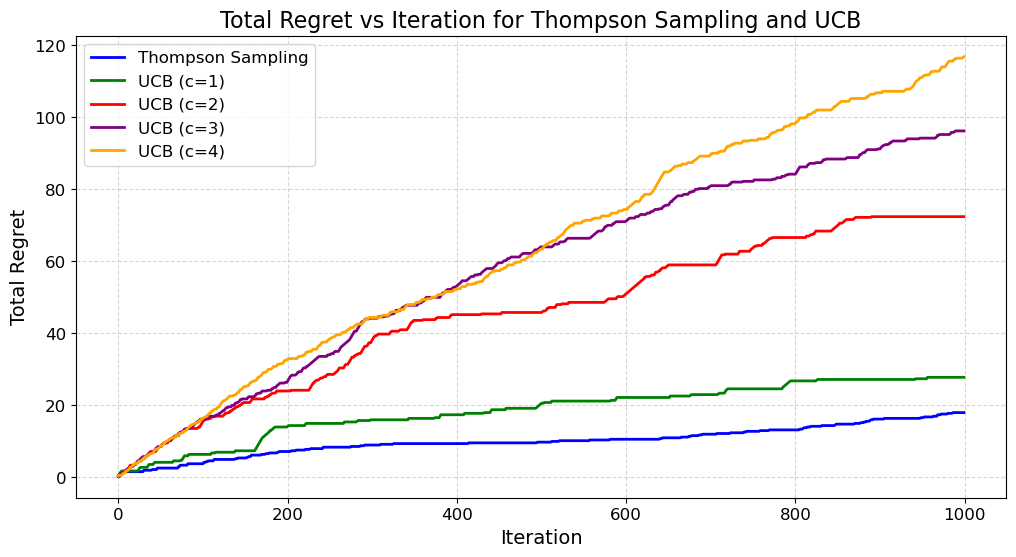

In [10]:
plt.figure(figsize=(12, 6))  

plt.plot(regrets_thompson, label='Thompson Sampling', color='blue', linewidth=2)
plt.plot(regrets_ucb_1, label='UCB (c=1)', color='green', linewidth=2)
plt.plot(regrets_ucb_2, label='UCB (c=2)', color='red', linewidth=2)
plt.plot(regrets_ucb_3, label='UCB (c=3)', color='purple', linewidth=2)
plt.plot(regrets_ucb_4, label='UCB (c=4)', color='orange', linewidth=2)

plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Total Regret', fontsize=14)
plt.title('Total Regret vs Iteration for Thompson Sampling and UCB', fontsize=16)

plt.legend(loc='upper left', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
